In [480]:
#Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import os

%matplotlib inline

In [481]:

# setup logger# setup l 
log_fmt = '%(asctime)s - %(name)s - %(levelname)s - %(message)s'
logging.basicConfig(level=logging.INFO, format=log_fmt)
    
# get logger
logger = logging.getLogger(__name__)

In [482]:

# Check if interactive plot is enabled, if not enable it.# Check i 

logger.info('Checking Interactive session')
    
if plt.isinteractive():
    print("Plotting is not interactive, Setting it to interactive mode ...")
    plt.interactive(True)
else:
    print("Plotting is already interactive")

2019-01-25 11:24:10,248 - __main__ - INFO - Checking Interactive session


Plotting is not interactive, Setting it to interactive mode ...


## DataVariables

Description

Loan_ID : Unique Loan ID <br>
Gender  : Male/ Female <br>

Married : Applicant married (Y/N) <br>

Dependents : Number of dependents <br>

Education : Applicant Education (Graduate/ Under Graduate) <br>

Self_Employed : Self employed (Y/N) <br>

ApplicantIncome : Applicant income <br>

CoapplicantIncome : Coapplicant income <br>

LoanAmount : Loan amount in thousands <br> 

Loan_Amount_Term : Term of loan in months <br>

Credit_History : credit history meets guidelines <br>

Property_Area : Urban/ Semi Urban/ Rural <br>

Loan_Status : Loan approved (Y/N) <br>

 

Note: <br>

Evaluation Metric is accuracy i.e. percentage of loan approval you correctly predict.<br>
You are expected to upload the solution in the format of "sample_submission.csv"

In [483]:
#Read DataSets
logger.info('Reading the loan datasets')


train_dataset = pd.read_csv(r"C:\Users\divyakamat\data\DataSets\loan\train.csv")
test_dataset = pd.read_csv(r"C:\Users\divyakamat\data\DataSets\loan\test.csv")

2019-01-25 11:24:10,381 - __main__ - INFO - Reading the loan datasets


In [484]:
train_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [485]:
#Generic function to count the number of rows and columns in train and test datasets

def file_count(dataset,typ):
    rows, columns = dataset.shape
    print("There are {0} rows in {1} dataset".format(rows,typ))
    print("There are {0} columns in {1} dataset\n".format(columns,typ))

#Invoke the function by passing the dataset name and the type of file
file_count(train_dataset,"training")
file_count(test_dataset,"test")

There are 614 rows in training dataset
There are 13 columns in training dataset

There are 367 rows in test dataset
There are 12 columns in test dataset



In [486]:
#map 999 value for Loan_Status column in test dataset and then concatenate training and test data
#axis = 1 --> Indicates, datasets would be combined colummn wise i.e., dataset1,dataset2
#axis = 0 --> Indicates, datasets would be combined row wise i.e., dataset1
#                                                                  dataset2

logger.info('Mapping NNN to Loan_Status column in test dataset')
logger.info('Concatenating train and test dataset')

test_dataset['Loan_Status']= 'NNN'
df_loan_dataset= pd.concat((train_dataset,test_dataset),axis=0)

2019-01-25 11:24:10,747 - __main__ - INFO - Mapping NNN to Loan_Status column in test dataset
2019-01-25 11:24:10,749 - __main__ - INFO - Concatenating train and test dataset


In [487]:
#convert all the columns to lower case
def to_lower(dataframe):
    dataframe.columns = map(str.lower,dataframe.columns)

logger.info("Converting all the columns to lower case")
to_lower(df_loan_dataset)

2019-01-25 11:24:10,871 - __main__ - INFO - Converting all the columns to lower case


In [488]:
#
logger.info("Getting the stats for columns")

print("There are totally {0} columns and they are \n\
        {1} \n".format(len(df_loan_dataset.columns),df_loan_dataset.columns))

#fetch numerical columns
df_loan_num_dataset = df_loan_dataset.select_dtypes(include=[np.number])
print("NUMERICAL COLUMNS :\n There are totally {0} numerical columns and they are \n\
        {1}".format(len(df_loan_num_dataset.columns),df_loan_num_dataset.columns))

#fetch non numerical columns
df_loan_obj_dataset = df_loan_dataset.select_dtypes(include=[np.object])
print("NON NUMERICAL COLUMNS :\n There are totally {0} numerical columns and they are \n\
        {1}".format(len(df_loan_obj_dataset.columns),df_loan_obj_dataset.columns))

2019-01-25 11:24:11,003 - __main__ - INFO - Getting the stats for columns


There are totally 13 columns and they are 
        Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object') 

NUMERICAL COLUMNS :
 There are totally 5 numerical columns and they are 
        Index(['applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history'],
      dtype='object')
NON NUMERICAL COLUMNS :
 There are totally 8 numerical columns and they are 
        Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'property_area', 'loan_status'],
      dtype='object')


Features where the categories are only labeled without any order of precedence are called nominal features.

Features which have some order associated with them are called ordinal features. For example, a feature like economic status, with three categories: low, medium and high, which have an order associated with them.

In [489]:
df_loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
loan_id              981 non-null object
gender               957 non-null object
married              978 non-null object
dependents           956 non-null object
education            981 non-null object
self_employed        926 non-null object
applicantincome      981 non-null int64
coapplicantincome    981 non-null float64
loanamount           954 non-null float64
loan_amount_term     961 non-null float64
credit_history       902 non-null float64
property_area        981 non-null object
loan_status          981 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


## Summary Statistics

In [490]:
df_loan_dataset.describe()

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [491]:
#New function to get the count of null values
def mising_num(x):
    return sum(x.isnull())

#Apply per column
print("Missing values per column in loan dataset")
print(df_loan_dataset.apply(mising_num,axis=0))  #axis=0 defines that function is to be applied on each column

Missing values per column in loan dataset
loan_id               0
gender               24
married               3
dependents           25
education             0
self_employed        55
applicantincome       0
coapplicantincome     0
loanamount           27
loan_amount_term     20
credit_history       79
property_area         0
loan_status           0
dtype: int64


In [492]:
df_loan_dataset[(df_loan_dataset["dependents"].notnull()) & (df_loan_dataset["married"]=="Yes")]

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CAD32DCEB8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001CAD3388518>]], dtype=object)

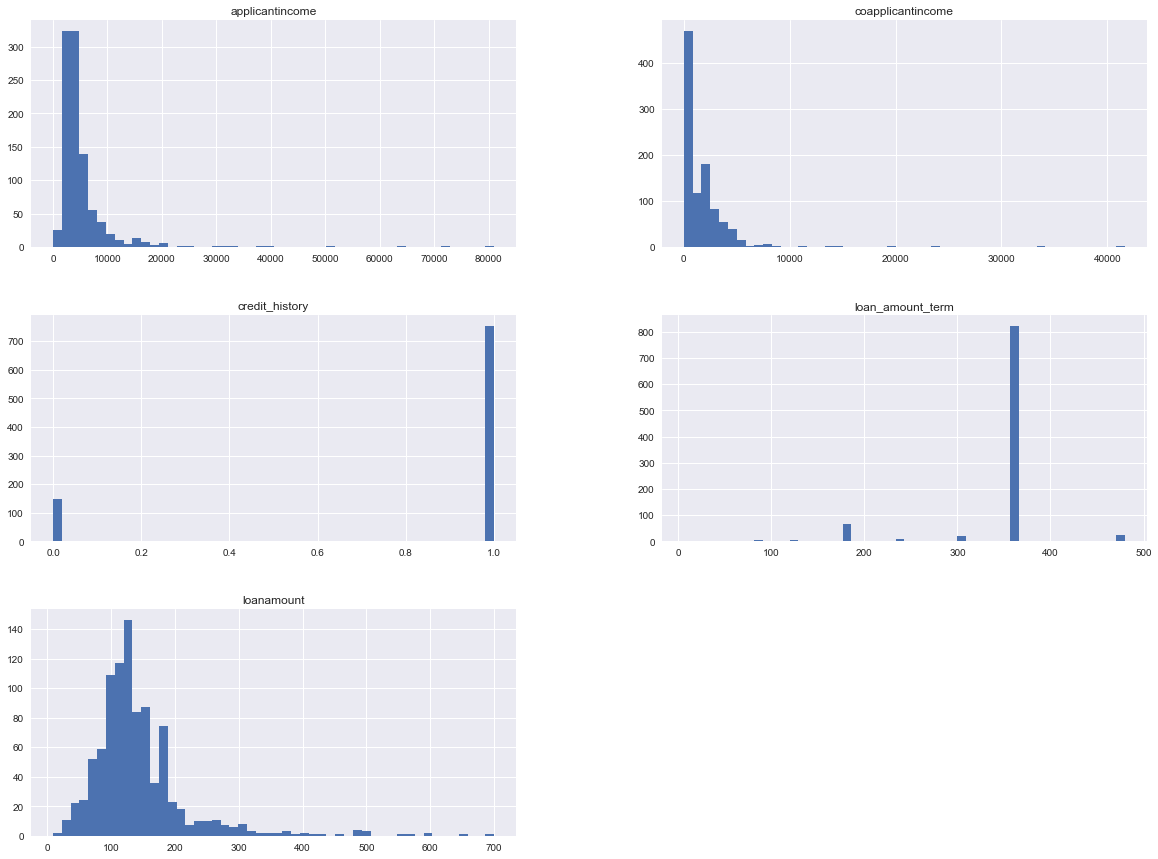

In [493]:
df_loan_dataset.hist(bins=50,figsize=(20,15))

Possible skew in the data by comparing the mean to the median 

mean > meadian - skewed to the right (that is, bunched up toward the left and with a "tail" stretching toward the right). 

mean < median - skewed to the left (that is, bunched up toward the left and with a "tail" stretching toward the right). 

### Categotical Features
As you will only be dealing with categorical features in this tutorial, it's better to filter them out. You can create a separate DataFrame consisting of only these features by running the following command. The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one.

In [494]:

cat_df_loan = df_loan_dataset.select_dtypes(include=['object']).copy()
cat_df_loan.head()

,loan_id,gender,married,dependents,education,self_employed,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [495]:
#Apply per column
print("Missing values per column in loan dataset for categorical columns")
print(cat_df_loan.apply(mising_num,axis=0))  #axis=0 defines that function is to be applied on each column

Missing values per column in loan dataset for categorical columns
loan_id           0
gender           24
married           3
dependents       25
education         0
self_employed    55
property_area     0
loan_status       0
dtype: int64


In [496]:
#Print value counts for all categorical variables

def value(df):    
    for i in cat_df_loan.columns:
        if i != "loan_id":
            print(df[i].value_counts() , "\n")

print("Print value counts for all categorical variables:\n")
value(cat_df_loan)  


Print value counts for all categorical variables:

Male      775
Female    182
Name: gender, dtype: int64 

Yes    631
No     347
Name: married, dtype: int64 

0     545
1     160
2     160
3+     91
Name: dependents, dtype: int64 

Graduate        763
Not Graduate    218
Name: education, dtype: int64 

No     807
Yes    119
Name: self_employed, dtype: int64 

Semiurban    349
Urban        342
Rural        290
Name: property_area, dtype: int64 

Y      422
NNN    367
N      192
Name: loan_status, dtype: int64 



loan_id
gender
married
dependents
education
self_employed
property_area
loan_status


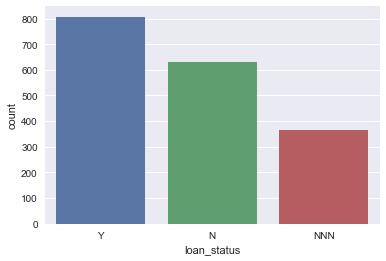

In [556]:
##Need to get this working##Need t 
#

# f, (axes) = plt.subplots(nrows=2, ncols=4, sharey=True,figsize=(15,6))

# for i in cat_df_loan.columns:
#     for j in axes.flat:
#         sns.countplot(x=i,data=cat_df_loan,ax=j)

# for i in range(0,len(cat_df_loan.columns)):
#     print(cat_df_loan.columns[i])
#     sns.countplot(x=cat_df_loan[cat_df_loan.columns[i]],data=cat_df_loan)

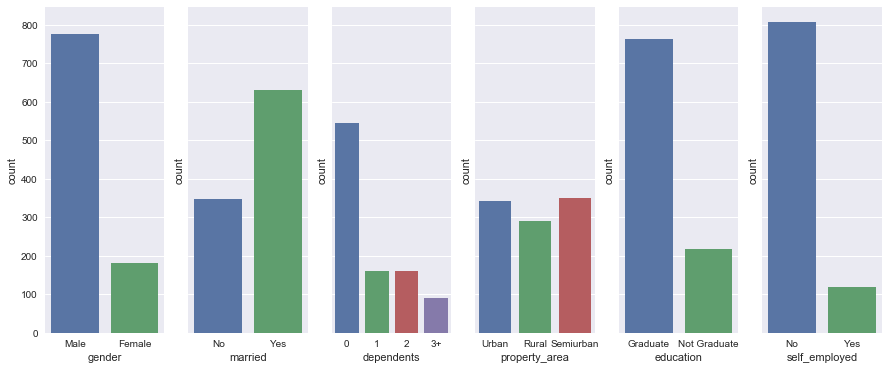

In [498]:
f, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(ncols=6, sharey=True,figsize=(15,6))

sns.countplot(x='gender',data=cat_df_loan,ax=ax1)
sns.countplot(x='married',data=cat_df_loan,ax=ax2)
sns.countplot(x='dependents',data=cat_df_loan,ax=ax3)
sns.countplot(x='property_area',data=cat_df_loan,ax=ax4)
sns.countplot(x='education',data=cat_df_loan,ax=ax5)
sns.countplot(x='self_employed',data=cat_df_loan,ax=ax6)

## Missing Value Treatment / Imputation

In [499]:
#Impute categorical variables first - self_employed / married / gender / dependents with median value
df_loan_dataset['self_employed'].fillna("No",inplace=True)
df_loan_dataset['gender'].fillna("Male",inplace=True)
df_loan_dataset['married'].fillna("Yes",inplace=True)
df_loan_dataset['dependents'].fillna('0',inplace=True)

In [500]:
print(df_loan_dataset.apply(mising_num,axis=0))

loan_id               0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicantincome       0
coapplicantincome     0
loanamount           27
loan_amount_term     20
credit_history       79
property_area         0
loan_status           0
dtype: int64


In [501]:
table = df_loan_dataset.pivot_table(values='loanamount', index='self_employed' ,columns='education', aggfunc=np.median)
print(table)

# Define function to return value of this pivot_table 
def fage(x): 
  return table.loc[x['self_employed'],x['education']] 

education      Graduate  Not Graduate
self_employed                        
No                130.0         117.0
Yes               150.0         130.0


In [502]:
# Replace missing values for Loan amount with the respective pivotal values for self_employed and education
df_loan_dataset['loanamount'].fillna(df_loan_dataset[df_loan_dataset['loanamount'].isnull()].apply(fage,axis=1), inplace=True) #axis=1 defines that function is to be applied on each row



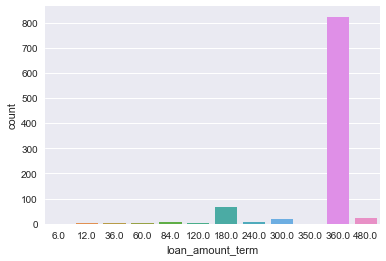

In [503]:
#Impute Loan amount term with median value
df_loan_dataset['loan_amount_term'].value_counts()
sns.countplot(x='loan_amount_term',data=df_loan_dataset)

median_loan_term = df_loan_dataset['loan_amount_term'].median()
df_loan_dataset['loan_amount_term'].fillna(median_loan_term,inplace=True)

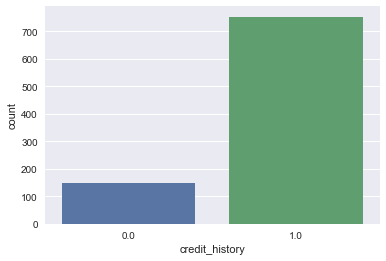

In [504]:
df_loan_dataset['credit_history'].value_counts()
sns.countplot(x='credit_history',data=df_loan_dataset)

df_loan_dataset['credit_history'].fillna(1.0,inplace=True)

In [505]:
print(df_loan_dataset.apply(mising_num,axis=0))

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64


## Encoding Variables

Let's analyze LoanAmount first. Since the extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let's try a log transformation to nullify their effect:

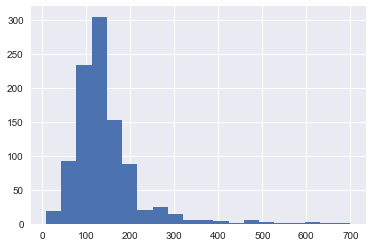

In [506]:
df_loan_dataset['loanamount'].hist(bins=20)

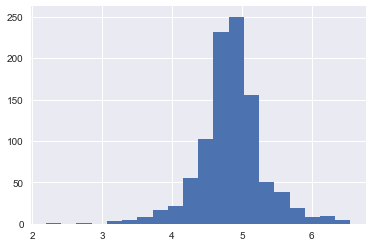

In [507]:
df_loan_dataset['log_loanamount']=np.log(df_loan_dataset['loanamount'])
df_loan_dataset['log_loanamount'].hist(bins=20)

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided

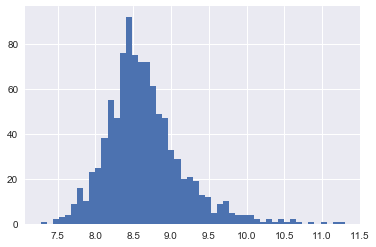

In [508]:
df_loan_dataset['total_income'] = df_loan_dataset['applicantincome'] + df_loan_dataset['coapplicantincome'] 
#df_loan_dataset['total_income'].hist(bins=50,figsize=(20,15))

df_loan_dataset['log_total_income']=np.log(df_loan_dataset['total_income'])
df_loan_dataset['log_total_income'].hist(bins=50)

#Create a new column loan_amount/total_income to give an idea of how well the applicant is suited to pay back his loan
df_loan_dataset['per_loan_amt']=(df_loan_dataset['log_loanamount']/df_loan_dataset['log_total_income'])*100
df_loan_dataset['per_loan_amt'].hist(bins=50)

### Label encoding

In [509]:
df_loan_dataset['dependents'].value_counts()

0     570
1     160
2     160
3+     91
Name: dependents, dtype: int64

In [510]:
#Label encoding using scikit learn

from sklearn.preprocessing import LabelEncoder
var_mod=['gender','married','education','self_employed','property_area','loan_status'] 
le = LabelEncoder() 
for i in var_mod: 
     df_loan_dataset[i] = le.fit_transform(df_loan_dataset[i]) 


In [511]:
#One hot encoding for dependents column
df_loan_dataset = pd.get_dummies(df_loan_dataset, columns=['dependents'])

In [512]:
corr_matrix = df_loan_dataset.corr()
corr_matrix["loanamount"]

gender               0.095479
married              0.155473
education           -0.165934
self_employed        0.109682
applicantincome      0.546680
coapplicantincome    0.178728
loanamount           1.000000
loan_amount_term     0.053674
credit_history      -0.003166
property_area       -0.037309
loan_status         -0.012281
log_loanamount       0.901475
total_income         0.597502
log_total_income     0.663772
dependents_0        -0.136682
dependents_1         0.038786
dependents_2         0.053094
dependents_3+        0.115450
Name: loanamount, dtype: float64

In [513]:
corr_matrix

,gender,married,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status,log_loanamount,total_income,log_total_income,dependents_0,dependents_1,dependents_2,dependents_3+
gender,1.000000,0.327012,0.040649,0.024719,0.060444,0.082428,0.095479,-0.069058,0.018627,-0.020801,0.016210,0.122549,0.094346,0.167323,-0.118262,-0.016439,0.118421,0.071256
married,0.327012,1.000000,0.026211,0.013666,0.052126,0.061606,0.155473,-0.047505,0.021738,0.006372,0.074367,0.180543,0.077085,0.151465,-0.360296,0.118849,0.245805,0.148371
education,0.040649,0.026211,1.000000,-0.010848,-0.138909,-0.060380,-0.165934,-0.021575,-0.062416,-0.050685,-0.068507,-0.146692,-0.158577,-0.215370,-0.057978,-0.023597,0.042769,0.074190
self_employed,0.024719,0.013666,-0.010848,1.000000,0.113106,-0.018861,0.109682,-0.031451,0.034485,-0.059678,0.008677,0.099155,0.098419,0.157912,-0.045207,0.047252,0.013448,-0.000417
applicantincome,0.060444,0.052126,-0.138909,0.113106,1.000000,-0.114247,0.546680,-0.023823,0.020201,0.005513,0.008314,0.417700,0.893847,0.707843,-0.093441,0.027478,-0.021144,0.150853
coapplicantincome,0.082428,0.061606,-0.060380,-0.018861,-0.114247,1.000000,0.178728,-0.042750,-0.011531,-0.024921,-0.046705,0.192982,0.343317,0.402275,-0.003330,-0.007011,0.018375,-0.008810
loanamount,0.095479,0.155473,-0.165934,0.109682,0.546680,0.178728,1.000000,0.053674,-0.003166,-0.037309,-0.012281,0.901475,0.597502,0.663772,-0.136682,0.038786,0.053094,0.115450
loan_amount_term,-0.069058,-0.047505,-0.021575,-0.031451,-0.023823,-0.042750,0.053674,1.000000,-0.021495,-0.041144,-0.018042,0.105836,-0.041817,-0.035838,0.084185,-0.045480,-0.011574,-0.070517
credit_history,0.018627,0.021738,-0.062416,0.034485,0.020201,-0.011531,-0.003166,-0.021495,1.000000,0.024342,0.413487,-0.030732,0.013894,0.040516,0.017282,0.031904,-0.006640,-0.061567
property_area,-0.020801,0.006372,-0.050685,-0.059678,0.005513,-0.024921,-0.037309,-0.041144,0.024342,1.000000,0.018207,-0.074072,-0.006035,-0.046242,-0.034088,0.046573,-0.008548,0.009549


C:\Users\divyakamat\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  app.launch_new_instance()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CAD3F67F28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001CAD584A358>]], dtype=object)

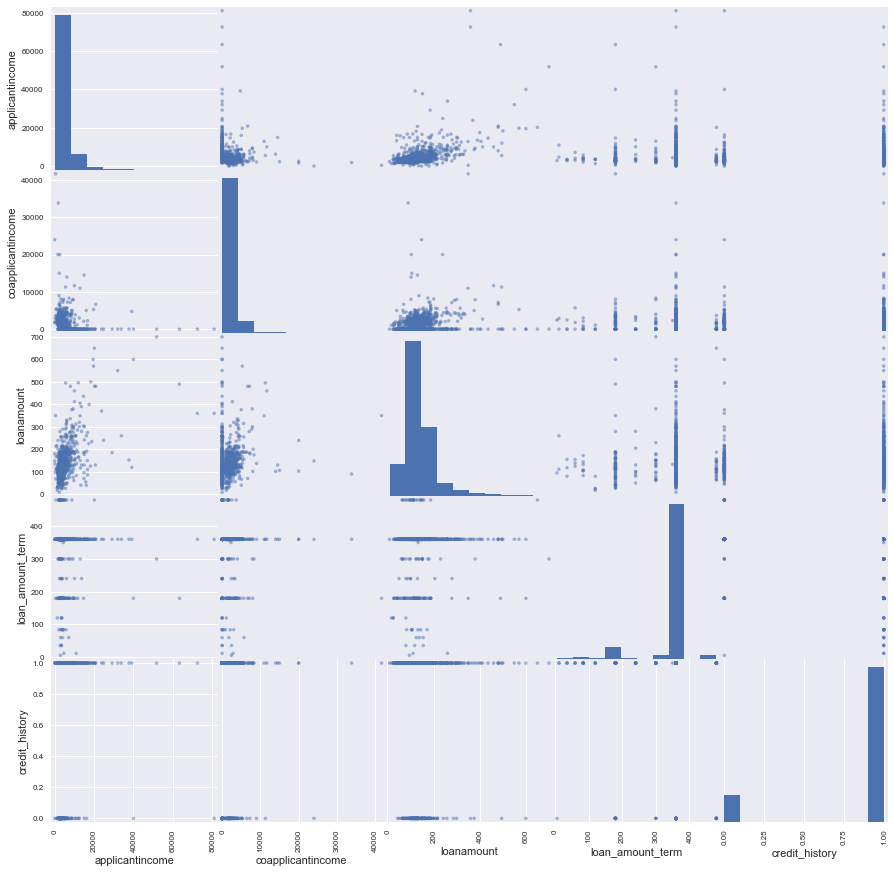

In [514]:
from pandas.tools.plotting import scatter_matrix
attributes = ["applicantincome", "coapplicantincome", "loanamount","loan_amount_term","credit_history"]
scatter_matrix(df_loan_dataset[attributes], figsize=(15, 15))

C:\Users\divyakamat\Anaconda2\envs\py36\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


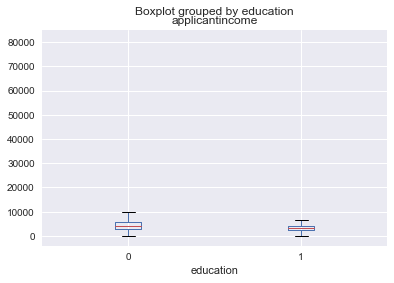

In [515]:
df_loan_dataset.boxplot(column='applicantincome', by = 'education')

In [516]:
df_loan_dataset.dtypes

loan_id               object
gender                 int64
married                int64
education              int64
self_employed          int64
applicantincome        int64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history       float64
property_area          int64
loan_status            int64
log_loanamount       float64
total_income         float64
log_total_income     float64
dependents_0           uint8
dependents_1           uint8
dependents_2           uint8
dependents_3+          uint8
dtype: object

## Building Model

In [518]:
# reorder columns, move loan Status column to first
columns = [column for column in df_loan_dataset.columns if column != 'loan_status']
columns = ['loan_status'] + columns
df_loan_dataset = df_loan_dataset[columns]

In [519]:
df_loan_dataset['loan_status'].value_counts()

2    422
1    367
0    192
Name: loan_status, dtype: int64

In [521]:
df_loan_dataset.head()

,loan_status,loan_id,gender,married,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,log_loanamount,total_income,log_total_income,dependents_0,dependents_1,dependents_2,dependents_3+
0,2,LP001002,1,0,0,0,5849,0.0,130.0,360.0,1.0,2,4.867534,5849.0,8.674026,1,0,0,0
1,0,LP001003,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,4.852030,6091.0,8.714568,0,1,0,0
2,2,LP001005,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,4.189655,3000.0,8.006368,1,0,0,0
3,2,LP001006,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,4.787492,4941.0,8.505323,1,0,0,0
4,2,LP001008,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,4.948760,6000.0,8.699515,1,0,0,0


In [522]:
df_loan_dataset.set_index('loan_id',inplace=True)

In [523]:
processed_data_path = os.path.join(r"C:\Users\divyakamat\data",'processed','loan_predict')
write_train_path = os.path.join(processed_data_path, 'train.csv')
write_test_path = os.path.join(processed_data_path, 'test.csv')

df_loan_dataset.loc[df_loan_dataset.loan_status != 1].to_csv(write_train_path) 
# test data
columns = [column for column in df_loan_dataset.columns if column != 'loan_status']
df_loan_dataset.loc[df_loan_dataset.loan_status == 1, columns].to_csv(write_test_path) 


In [524]:
df_loan_dataset.head()

,loan_status,gender,married,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,log_loanamount,total_income,log_total_income,dependents_0,dependents_1,dependents_2,dependents_3+
loan_id,,,,,,,,,,,,,,,,,,
LP001002,2,1,0,0,0,5849,0.0,130.0,360.0,1.0,2,4.867534,5849.0,8.674026,1,0,0,0
LP001003,0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,4.852030,6091.0,8.714568,0,1,0,0
LP001005,2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,4.189655,3000.0,8.006368,1,0,0,0
LP001006,2,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,4.787492,4941.0,8.505323,1,0,0,0
LP001008,2,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,4.948760,6000.0,8.699515,1,0,0,0


In [525]:
df_loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, LP001002 to LP002989
Data columns (total 18 columns):
loan_status          981 non-null int64
gender               981 non-null int64
married              981 non-null int64
education            981 non-null int64
self_employed        981 non-null int64
applicantincome      981 non-null int64
coapplicantincome    981 non-null float64
loanamount           981 non-null float64
loan_amount_term     981 non-null float64
credit_history       981 non-null float64
property_area        981 non-null int64
log_loanamount       981 non-null float64
total_income         981 non-null float64
log_total_income     981 non-null float64
dependents_0         981 non-null uint8
dependents_1         981 non-null uint8
dependents_2         981 non-null uint8
dependents_3+        981 non-null uint8
dtypes: float64(7), int64(7), uint8(4)
memory usage: 118.8+ KB


In [526]:

processed_data_path = os.path.join(r"C:\Users\divyakamat\data",'processed','loan_predict')
train_file_path = os.path.join(processed_data_path, 'train.csv')
test_file_path = os.path.join(processed_data_path, 'test.csv')

In [527]:
train_df = pd.read_csv(train_file_path,index_col='loan_id')
test_df = pd.read_csv(test_file_path,index_col='loan_id')

#Replace loan status 2 with 1
train_df['loan_status'].replace(2,1, inplace=True)

In [529]:
test_df.head()

,gender,married,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,log_loanamount,total_income,log_total_income,dependents_0,dependents_1,dependents_2,dependents_3+
loan_id,,,,,,,,,,,,,,,,,
LP001015,1,1,0,0,5720,0.0,110.0,360.0,1.0,2,4.700480,5720.0,8.651724,1,0,0,0
LP001022,1,1,0,0,3076,1500.0,126.0,360.0,1.0,2,4.836282,4576.0,8.428581,0,1,0,0
LP001031,1,1,0,0,5000,1800.0,208.0,360.0,1.0,2,5.337538,6800.0,8.824678,0,0,1,0
LP001035,1,1,0,0,2340,2546.0,100.0,360.0,1.0,2,4.605170,4886.0,8.494129,0,0,1,0
LP001051,1,0,1,0,3276,0.0,78.0,360.0,1.0,2,4.356709,3276.0,8.094378,1,0,0,0


In [530]:
X = train_df.loc[:,'gender':].as_matrix().astype('float')
y = train_df['loan_status'].ravel()

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 18 columns):
loan_status          614 non-null int64
gender               614 non-null int64
married              614 non-null int64
education            614 non-null int64
self_employed        614 non-null int64
applicantincome      614 non-null int64
coapplicantincome    614 non-null float64
loanamount           614 non-null float64
loan_amount_term     614 non-null float64
credit_history       614 non-null float64
property_area        614 non-null int64
log_loanamount       614 non-null float64
total_income         614 non-null float64
log_total_income     614 non-null float64
dependents_0         614 non-null int64
dependents_1         614 non-null int64
dependents_2         614 non-null int64
dependents_3+        614 non-null int64
dtypes: float64(7), int64(11)
memory usage: 91.1+ KB


In [531]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, LP001015 to LP002989
Data columns (total 17 columns):
gender               367 non-null int64
married              367 non-null int64
education            367 non-null int64
self_employed        367 non-null int64
applicantincome      367 non-null int64
coapplicantincome    367 non-null float64
loanamount           367 non-null float64
loan_amount_term     367 non-null float64
credit_history       367 non-null float64
property_area        367 non-null int64
log_loanamount       367 non-null float64
total_income         367 non-null float64
log_total_income     367 non-null float64
dependents_0         367 non-null int64
dependents_1         367 non-null int64
dependents_2         367 non-null int64
dependents_3+        367 non-null int64
dtypes: float64(7), int64(10)
memory usage: 51.6+ KB


In [532]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(491, 17) (491,)
(123, 17) (123,)


In [533]:
# average loan status in train and test
print("mean loan status in train : {0:.3f}".format(np.mean(y_train)))
print("mean loan status in test : {0:.3f}".format(np.mean(y_test)))

mean loan status in train : 0.676
mean loan status in test : 0.732


## Baseline Model

In [534]:
# import function
from sklearn.dummy import DummyClassifier

# create model
model_dummy = DummyClassifier(strategy='most_frequent', random_state=0)

# train model
model_dummy.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')

In [535]:
print ('score for baseline model : {0:.2f}'.format(model_dummy.score(X_test, y_test)))

score for baseline model : 0.73


In [536]:
# peformance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
# accuracy score
print ('accuracy for baseline model : {0:.2f}'.format(accuracy_score(y_test, model_dummy.predict(X_test))))
# confusion matrix
print ('confusion matrix for baseline model: \n {0}'.format(confusion_matrix(y_test, model_dummy.predict(X_test))))
# precision and recall scores
print ('precision for baseline model : {0:.2f}'.format(precision_score(y_test, model_dummy.predict(X_test))))
print ('recall for baseline model : {0:.2f}'.format(recall_score(y_test, model_dummy.predict(X_test))))

accuracy for baseline model : 0.73
confusion matrix for baseline model: 
 [[ 0 33]
 [ 0 90]]
precision for baseline model : 0.73
recall for baseline model : 1.00


In [537]:
# converting to the matrix
test_X = test_df.as_matrix().astype('float')
# get predictions
predictions = model_dummy.predict(test_X)
df_submission = pd.DataFrame({'Loan_ID': test_df.index, 'Loan_Status' : predictions} )

In [538]:
df_submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [539]:
submission_data_path = os.path.join(r"C:\Users\divyakamat\data",'external','loan')
submission_file_path = os.path.join(submission_data_path, '01_baseline.csv')
df_submission.to_csv(submission_file_path, index=False)

## Logistic Regression Model

In [540]:
# import function
from sklearn.linear_model import LogisticRegression

# create model
model_lr_1 = LogisticRegression(random_state=0,C=3.5)

# train model
model_lr_1.fit(X_train,y_train)

LogisticRegression(C=3.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [541]:
# evaluate model
print('score for logistic regression - version 1 : {0:.2f}'.format(model_lr_1.score(X_test, y_test)))

score for logistic regression - version 1 : 0.84


In [542]:
# peformance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
# accuracy score
print ('accuracy for baseline model : {0:.2f}'.format(accuracy_score(y_test, model_lr_1.predict(X_test))))
# confusion matrix
print ('confusion matrix for baseline model: \n {0}'.format(confusion_matrix(y_test, model_lr_1.predict(X_test))))
# precision and recall scores
print ('precision for baseline model : {0:.2f}'.format(precision_score(y_test, model_lr_1.predict(X_test))))
print ('recall for baseline model : {0:.2f}'.format(recall_score(y_test, model_lr_1.predict(X_test))))

accuracy for baseline model : 0.84
confusion matrix for baseline model: 
 [[15 18]
 [ 2 88]]
precision for baseline model : 0.83
recall for baseline model : 0.98


In [547]:
# converting to the matrix
test_X = test_df.as_matrix().astype('float')
# get predictions
predictions = model_lr_1.predict(test_df)
df_submission = pd.DataFrame({'Loan_ID': test_df.index, 'Loan_Status' : predictions} )

In [548]:
# model coefficients
model_lr_1.coef_

array([[ -8.46717825e-02,   3.08377790e-01,  -3.75691571e-01,
          1.60462267e-02,   2.12623840e-05,  -4.38961932e-05,
         -8.48843335e-04,  -3.16605260e-03,   2.12949012e+00,
          1.16609323e-01,  -1.34392995e-01,  -2.26338304e-05,
          9.73294211e-02,  -3.38935357e-02,  -1.87370694e-01,
          1.02121444e-01,   9.93488435e-02]])

In [549]:
submission_data_path = os.path.join(r"C:\Users\divyakamat\data",'external','loan')
submission_file_path = os.path.join(submission_data_path, '02_lr_model.csv')

df_submission.to_csv(submission_file_path, index=False)

## Decision Tree Model

In [550]:
from sklearn import tree

model_dr_1 = tree.DecisionTreeClassifier()

# train model
model_dr_1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [551]:
# evaluate model
print('score for decision tree model - version 1 : {0:.2f}'.format(model_dr_1.score(X_test, y_test)))

score for decision tree model - version 1 : 0.79
